In [13]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("C:\\Users\\libin_urv2w13\\Desktop\\mljourney\\seaborn-works\\customer-data-task\\customer_data_cleaning_eda.csv")
print(df.columns)

Index(['CustomerID', 'Country', 'Age', 'Gender', 'Salary', 'Purchased',
       'SpendingScore', 'VisitsPerMonth', 'SatisfactionScore', 'JoinDate',
       'Churn'],
      dtype='str')


In [14]:
print(df.head())
print(df.tail())

   CustomerID  Country   Age  Gender   Salary Purchased  SpendingScore  \
0           1    Italy  29.0    Male  60000.0        No             59   
1           2    India  61.0    Male  31000.0       Yes              5   
2           3  Germany  53.0  Female  54000.0       Yes             51   
3           4    India  65.0  Female      NaN       Yes             21   
4           5    India  21.0    Male  84000.0       Yes             12   

   VisitsPerMonth  SatisfactionScore    JoinDate  Churn  
0               2                1.0  2019-09-15      0  
1               3                NaN  2020-09-14      0  
2               1                2.0  2020-03-13      1  
3               7                2.0  2019-06-19      0  
4               5                4.0  2018-10-29      0  
      CustomerID  Country   Age  Gender   Salary Purchased  SpendingScore  \
1015         134    India  56.0  Female  68000.0        No             32   
1016         105   France  49.0  Female  70000.0     

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1020 non-null   int64  
 1   Country            1020 non-null   str    
 2   Age                931 non-null    float64
 3   Gender             971 non-null    str    
 4   Salary             922 non-null    float64
 5   Purchased          1020 non-null   str    
 6   SpendingScore      1020 non-null   int64  
 7   VisitsPerMonth     1020 non-null   int64  
 8   SatisfactionScore  875 non-null    float64
 9   JoinDate           1020 non-null   str    
 10  Churn              1020 non-null   int64  
dtypes: float64(3), int64(4), str(4)
memory usage: 87.8 KB


In [16]:
df.describe()

,CustomerID,Age,Salary,SpendingScore,VisitsPerMonth,SatisfactionScore,Churn
count,1020.000000,931.000000,922.000000,1020.000000,1020.000000,875.000000,1020.000000
mean,499.496078,43.998926,69331.887202,50.529412,2.992157,3.106286,0.194118
std,289.213164,14.691780,28334.255127,28.637392,1.746421,1.405740,0.395714
min,1.000000,18.000000,20000.000000,1.000000,0.000000,1.000000,0.000000
25%,249.750000,32.000000,45000.000000,25.000000,2.000000,2.000000,0.000000
50%,497.500000,44.000000,68500.000000,52.000000,3.000000,3.000000,0.000000
75%,750.250000,56.500000,93000.000000,75.000000,4.000000,4.000000,0.000000
max,1000.000000,69.000000,119000.000000,100.000000,10.000000,5.000000,1.000000


In [17]:
df.isnull().sum()

CustomerID             0
Country                0
Age                   89
Gender                49
Salary                98
Purchased              0
SpendingScore          0
VisitsPerMonth         0
SatisfactionScore    145
JoinDate               0
Churn                  0
dtype: int64

In [18]:
df["Age"]=df["Age"].fillna(df["Age"].median(),inplace=True)
df["Gender"]=df["Gender"].fillna("Unknown",inplace=True)
df["Salary"]=df["Salary"].fillna(df["Salary"].mean(),inplace=True)
df["SatisfactionScore"]=df["SatisfactionScore"].fillna(df["SatisfactionScore"].mode()[0],inplace=True)
df.isnull().sum()

C:\Users\libin_urv2w13\AppData\Local\Temp\ipykernel_11320\642491016.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["Age"]=df["Age"].fillna(df["Age"].median(),inplace=True)
C:\Users\libin_urv2w13\AppData\Local\Temp\ipykernel_11320\642491016.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series t

CustomerID           0
Country              0
Age                  0
Gender               0
Salary               0
Purchased            0
SpendingScore        0
VisitsPerMonth       0
SatisfactionScore    0
JoinDate             0
Churn                0
dtype: int64

In [22]:
df[df["CustomerID"].duplicated()].shape


(20, 11)

In [23]:
df=df.drop_duplicates(subset=["CustomerID"],keep="first")

In [24]:
df[df["CustomerID"].duplicated()].shape

(0, 11)

In [27]:
df["JoinDate"] = pd.to_datetime(df["JoinDate"])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   int64         
 1   Country            1000 non-null   str           
 2   Age                1000 non-null   float64       
 3   Gender             1000 non-null   str           
 4   Salary             1000 non-null   float64       
 5   Purchased          1000 non-null   str           
 6   SpendingScore      1000 non-null   int64         
 7   VisitsPerMonth     1000 non-null   int64         
 8   SatisfactionScore  1000 non-null   float64       
 9   JoinDate           1000 non-null   datetime64[us]
 10  Churn              1000 non-null   int64         
dtypes: datetime64[us](1), float64(3), int64(4), str(3)
memory usage: 86.1 KB


<Axes: ylabel='Salary'>

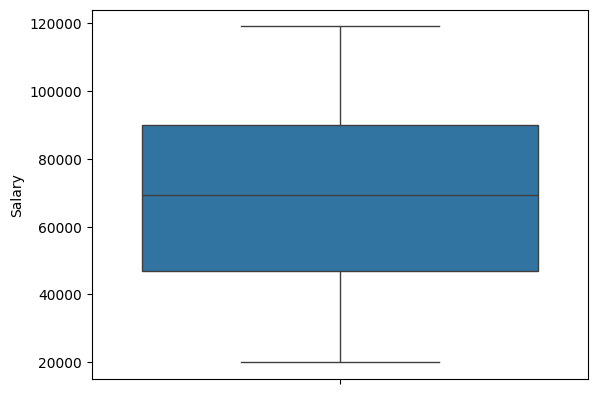

In [32]:
sns.boxplot(data=df,y="Salary")

<Axes: xlabel='Age', ylabel='Count'>

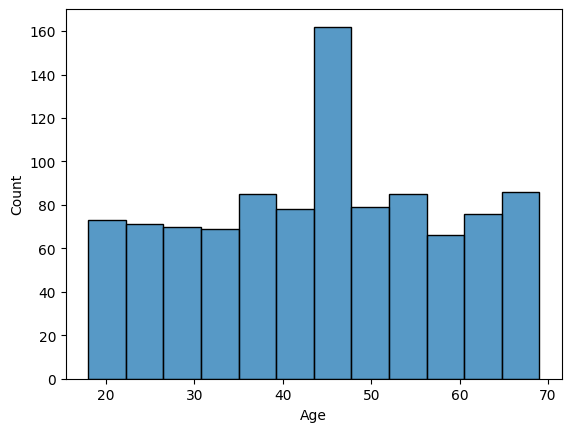

In [33]:
sns.histplot(data=df,x="Age")

<Axes: xlabel='Salary', ylabel='Count'>

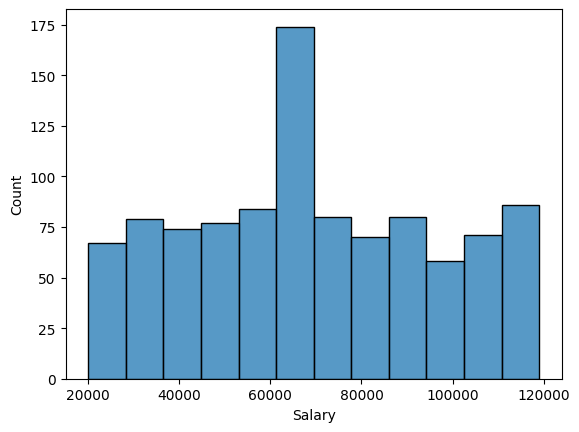

In [34]:
sns.histplot(data=df,x="Salary")

<Axes: xlabel='Country', ylabel='Count'>

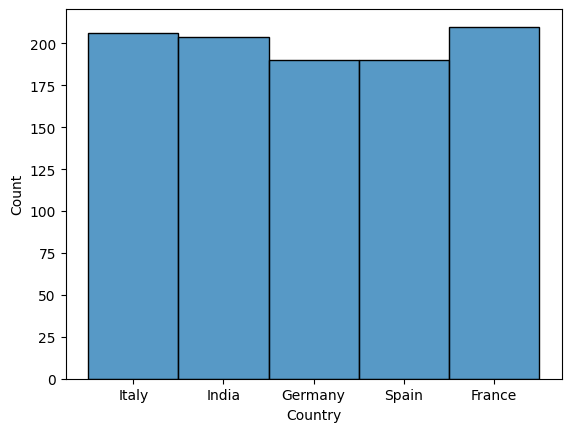

In [35]:
sns.histplot(data=df,x="Country")

<Axes: xlabel='Purchased', ylabel='Count'>

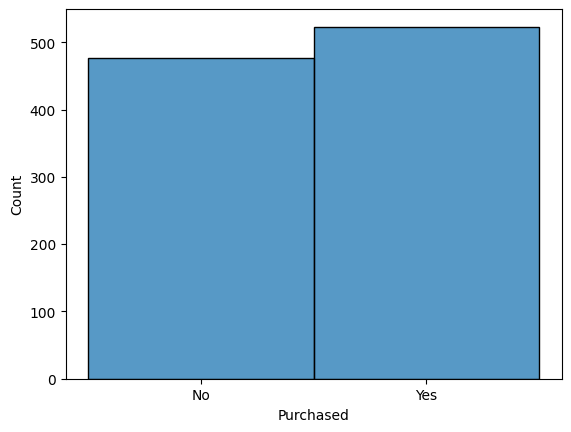

In [36]:
sns.histplot(data=df,x="Purchased")

<Axes: xlabel='Churn', ylabel='Count'>

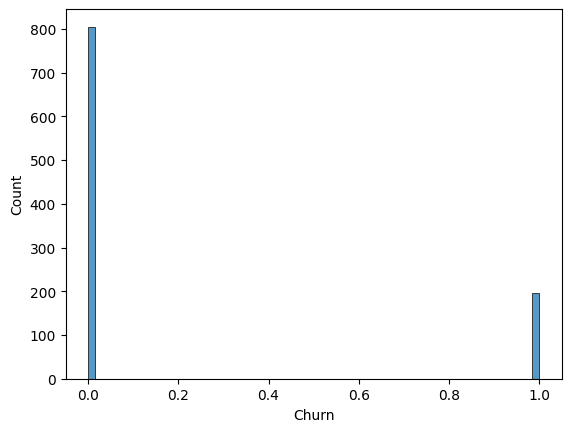

In [37]:
sns.histplot(data=df,x="Churn")

<Axes: xlabel='Purchased', ylabel='Salary'>

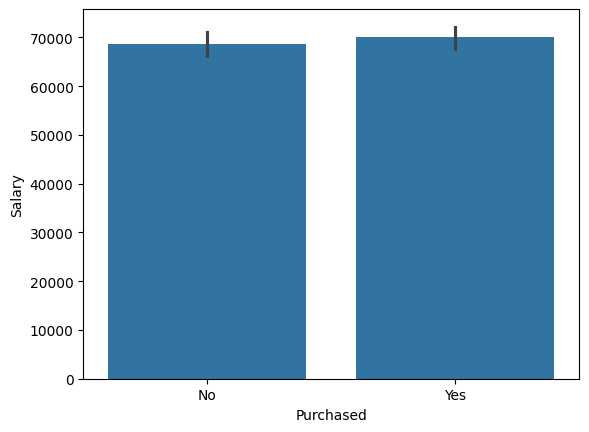

In [42]:
sns.barplot(data=df, x="Purchased",y="Salary")

<Axes: xlabel='Age', ylabel='SpendingScore'>

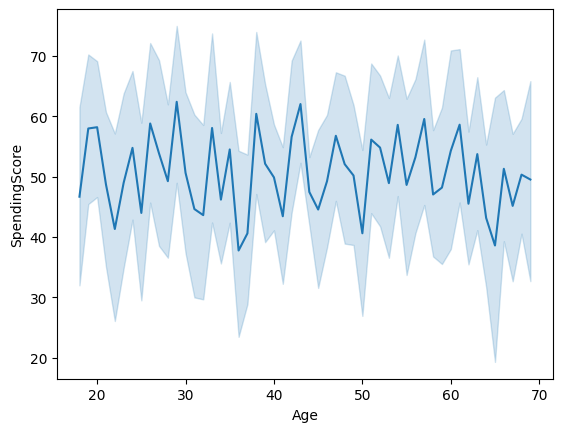

In [62]:
sns.lineplot(data=df, x="Age",y="SpendingScore")

<Axes: xlabel='Country', ylabel='Churn'>

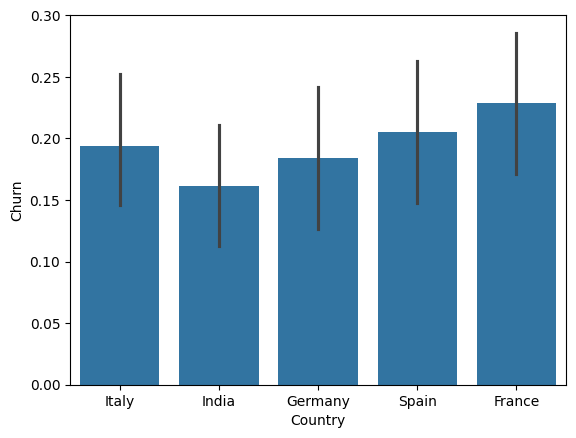

In [58]:
sns.barplot(data=df,x="Country",y="Churn")

<Axes: xlabel='Gender', ylabel='Salary'>

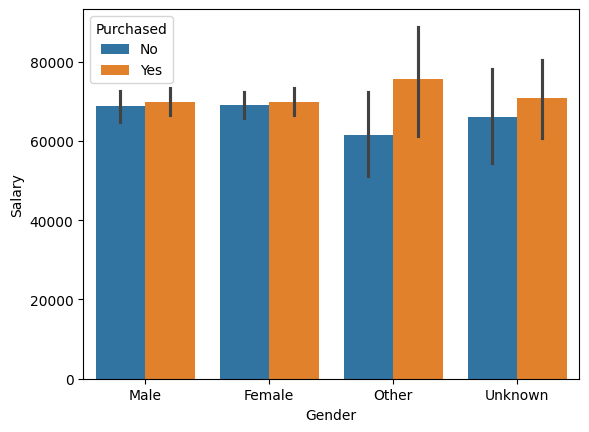

In [67]:
sns.barplot(data=df,x="Gender",y="Salary",hue="Purchased")

<Axes: >

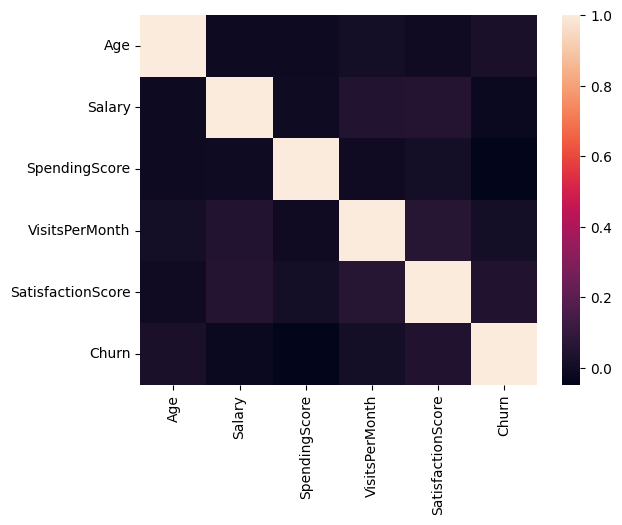

In [68]:
columns = ["Age","Salary","SpendingScore","VisitsPerMonth","SatisfactionScore","Churn"]
sns.heatmap(df[columns].corr())

In [ ]:
"""1) highest churn belongs to france from barplot
    2) higher salary does not necessarily lead to higher purchase, from barplot
    3) spending score is highest for 45 age group, from lineplot

"""